In [ ]:
 # # 加载数据并进行初步分析
# # defining column names in the data since it has no column names yet
# index_names = ['engine', 'cycle']
# setting_names = ['setting_1', 'setting_2', 'setting_3']
# sensor_names = ['Fan Inlet Temperature',
#                 'LPC Outlet Temperature',
#                 'HPC Outlet Temperature',
#                 'LPT Outlet Temperature',
#                 'Fan Inlet Pressure',
#                 'Bypass-duct Pressure',
#                 'HPC Outlet Pressure',
#                 'Physical Fan Speed',
#                 'Physical Core Speed',
#                 'Engine Pressure Ratio (P50/P2)',
#                 'HPC Outlet Static Pressure',
#                 'Ratio of feul flow to Ps30',
#                 'Corrected Fan Speed',
#                 'Corrected Core Speed',
#                 'Bypass Ratio',
#                 'Burner feul-air ratio',
#                 'Bleed Enthalpy',
#                 'Required Fan Speed',
#                 'Required Fan Conversion Speed',
#                 'HPT Cool Airflow',
#                 'LPT Cool Airflow']

# col_names = index_names + setting_names + sensor_names
# df_train = pd.read_csv((r"CMAPSSData/train_FD001.txt"), sep="\s+", header=None, names=col_names)
# df_test = pd.read_csv((r"CMAPSSData/test_FD001.txt"), sep="\s+", header=None, names=col_names)
# df_rul = pd.read_csv((r"CMAPSSData/RUL_FD001.txt"), sep="\s+", header=None, names = ['left life'])

In [ ]:
# df_train.head(5)

In [ ]:
import pandas as pd
from scipy.signal import savgol_filter  #  调用Savitzky-Golay滤波器函数
dir_path = './CMAPSSData/'
# 定义列名以便索引
index_names = ['unit_nr', 'time_cycles']
setting_names = ['op_1', 'op_2', 'op_3']
sensor_names = ['s_{}'.format(i) for  i in range(1, 22)]  # 生成传感器名
col_names = index_names + setting_names + sensor_names  # 所有列名

# 读取数据
train = pd.read_csv((dir_path + 'train_FD001.txt'), sep='\s+', header=None, names=col_names)
test = pd.read_csv((dir_path + 'test_FD001.txt'), sep='\s+', header=None, names=col_names)
y_test = pd.read_csv((dir_path + 'RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])
train.describe()
# ['unit_nr'].dtype


,unit_nr,time_cycles,op_1,op_2,op_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


提取数据代码，用于画图的，训练模型的时候可以跳过。

In [ ]:
# #对单独的文件进行归一化
# import pandas as pd
# from scipy.signal import savgol_filter
# from sklearn.preprocessing import MinMaxScaler

# # 选择 'unit_nr' 列数值为 1 的行，并提取 's_14' 列的数据
# extractFilteredData = extractTrain[extractTrain['unit_nr'] == 1]['s_14']


# # 选择 'unit_nr' 列数值为 1 的行，并提取 's_14' 列的数据
# extractFilteredData = extractTrain[extractTrain['unit_nr'] == 1]['s_14']

# # 进行 min-max 标准化处理
# extractScaler = MinMaxScaler()
# extractFilteredDataNormalized = extractScaler.fit_transform(extractFilteredData.values.reshape(-1, 1)).flatten()

# # 对标准化后的数据进行 Savitzky-Golay 滤波
# extractFilteredDataSmoothed = savgol_filter(extractFilteredDataNormalized, window_length=5, polyorder=2, mode='nearest')

# # # 将处理后的数据输出到文件
# # with open('extract_Output_S14_U1.txt', 'w') as f:
# #     for value in extractFilteredDataSmoothed:
# #         f.write(str(value) + '\n')

# # print("处理完成并已输出到文件 'extract_Output_S14_U1.txt' 中。")

In [ ]:
# 删除所有的非单调数据（完成图3数据准备第4步骤）
drop_sensors = ['s_1', 's_5', 's_6', 's_10', 's_14', 's_16', 's_18', 's_19']
drop_labels = setting_names + drop_sensors
# drop_labels = drop_sensors
newTrain=train.drop(labels=drop_labels, axis=1, inplace=False)

# 对每个传感器信号应用Savitzky-Golay滤波（完成图3数据准备完成第3步骤）
frame_length = 51  # 帧长，必须是奇数
poly_order = 3  # 多项式阶数
for sensor in sensor_names:
    if sensor in newTrain.columns:  # 确保只对存在于DataFrame中的传感器进行操作
        newTrain[sensor] = savgol_filter(newTrain[sensor], frame_length, poly_order)
        newTrain[sensor] = savgol_filter(newTrain[sensor], frame_length, poly_order)

# 在原始数据上应用最小-最大规范化
newTrain.iloc[:, 2:] = (newTrain.iloc[:, 2:] - newTrain.iloc[:, 2:].min()) / (newTrain.iloc[:, 2:].max() - newTrain.iloc[:, 2:].min())

# 打印数据信息
df=newTrain
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_nr      20631 non-null  int64  
 1   time_cycles  20631 non-null  int64  
 2   s_2          20631 non-null  float64
 3   s_3          20631 non-null  float64
 4   s_4          20631 non-null  float64
 5   s_7          20631 non-null  float64
 6   s_8          20631 non-null  float64
 7   s_9          20631 non-null  float64
 8   s_11         20631 non-null  float64
 9   s_12         20631 non-null  float64
 10  s_13         20631 non-null  float64
 11  s_15         20631 non-null  float64
 12  s_17         20631 non-null  float64
 13  s_20         20631 non-null  float64
 14  s_21         20631 non-null  float64
dtypes: float64(13), int64(2)
memory usage: 2.4 MB


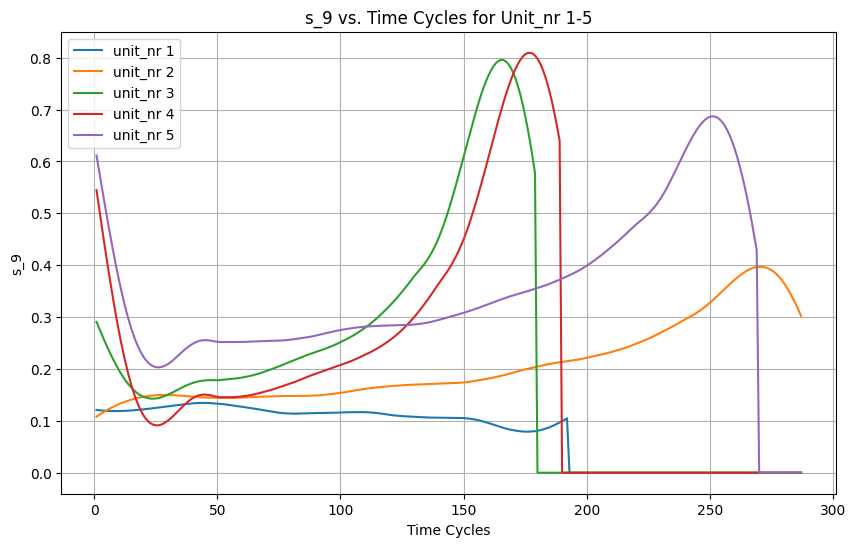

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 选择unit_nr数值为1至5的五个引擎对象的数据
selected_units = newTrain[newTrain['unit_nr'].isin([1, 2, 3, 4, 5])]

# 获取五个引擎对象的最大时间周期数
max_time_cycles = selected_units['time_cycles'].max()

# 创建一个空的DataFrame，用于存储补齐后的数据
filled_data = pd.DataFrame()

# 对于每个引擎对象，补齐数据并添加到filled_data中
for unit_nr, group_data in selected_units.groupby('unit_nr'):
    time_cycles = group_data['time_cycles']
    s_9_values = group_data['s_9']
    filled_s_9_values = np.concatenate([s_9_values.values, np.zeros(max_time_cycles - len(s_9_values))])
    filled_data[unit_nr] = filled_s_9_values

# 绘制图表
plt.figure(figsize=(10, 6))
for unit_nr in filled_data.columns:
    plt.plot(range(1, max_time_cycles + 1), filled_data[unit_nr], label=f'unit_nr {unit_nr}')

plt.xlabel('Time Cycles')
plt.ylabel('s_9')
plt.title('s_9 vs. Time Cycles for Unit_nr 1-5')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-11-8c296782ed5c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_units['change_point'] = selected_units["max_cycle"] - random_rul  # 计算变换点
<ipython-input-11-8c296782ed5c>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_units["new_RUL"] = np.where(
<ipython-input-11-8c296782ed5c>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

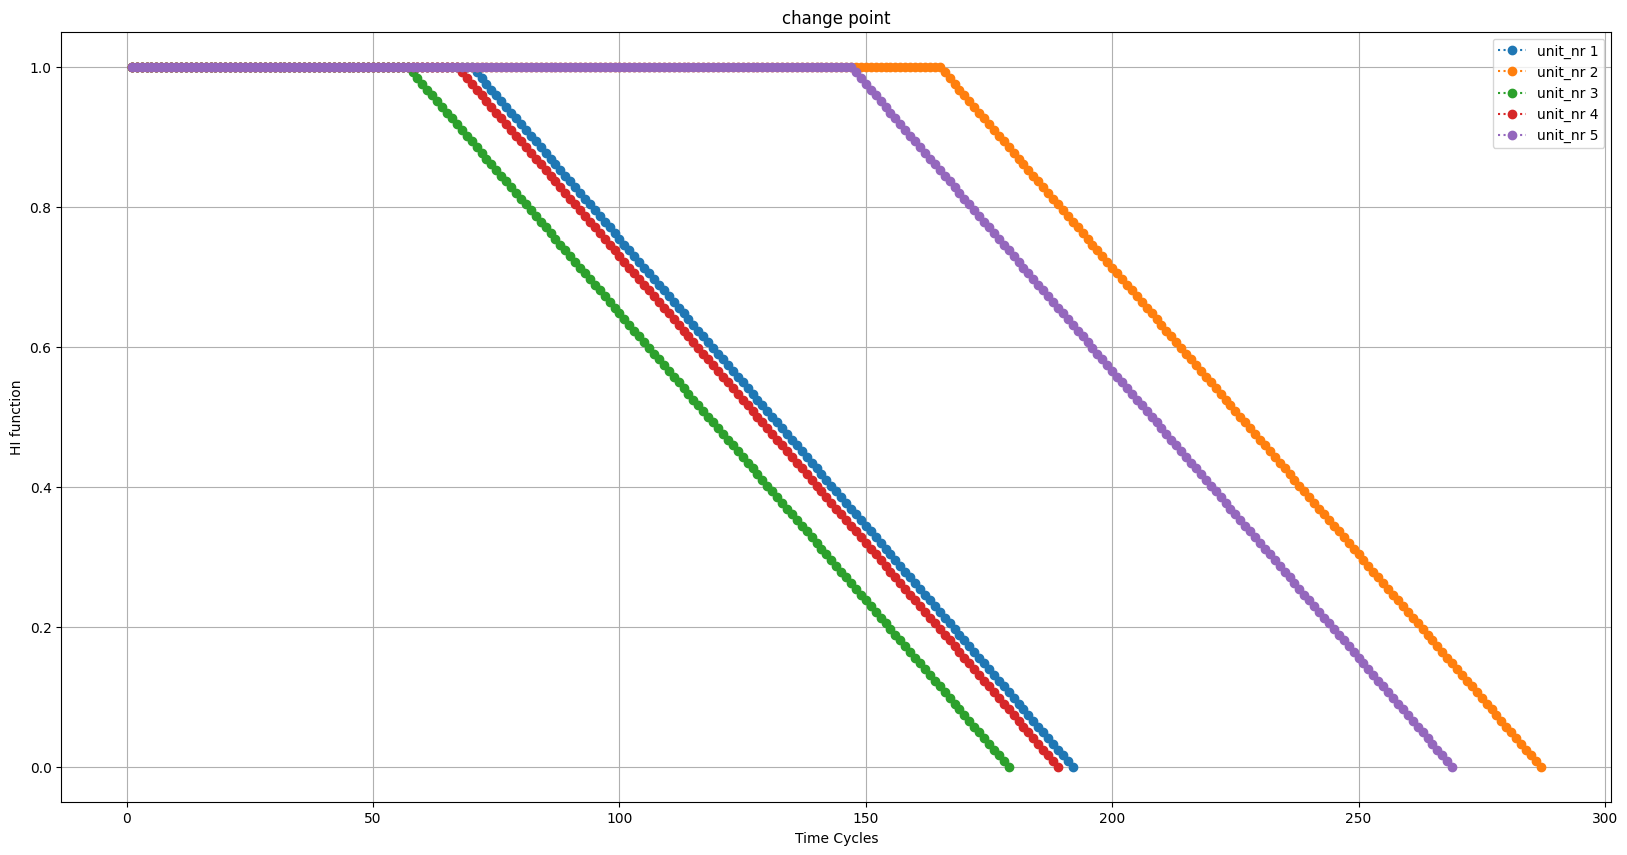

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# df = newTrain
# 示例数据和计算最大循环次数
# 假设df已经被定义，并且包含'unit_nr'和'time_cycles'列
grouped_by_unit = df.groupby('unit_nr')
max_cycle = grouped_by_unit['time_cycles'].max()
# 合并最大循环次数回原始数据框架
result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)

# 选择特定的5个unit_nr进行操作
selected_unit_nrs = [1, 2, 3, 4, 5]
selected_units = result_frame[result_frame['unit_nr'].isin(selected_unit_nrs)]

# 计算变换点
if (selected_units["max_cycle"] <= 120).any():
    print("Error: Some max_cycle values in selected units are not greater than 120.")
else:
    random_rul = np.random.randint(120, 131)  # 随机生成一个介于120-130之间的随机使用寿命
    selected_units['change_point'] = selected_units["max_cycle"] - random_rul  # 计算变换点

    # # 生成新的RUL预测列
    # selected_units["new_RUL"] = np.where(selected_units["time_cycles"] < selected_units['change_point'], 1,
    #                                      selected_units["max_cycle"] - selected_units["time_cycles"])
    # 生成新的RUL预测列
    selected_units["new_RUL"] = np.where(
        selected_units["time_cycles"] < selected_units['change_point'],
        selected_units["max_cycle"] - selected_units['change_point'],  # 当time_cycles小于change_point时，使用max_cycle的值
        selected_units["max_cycle"] - selected_units["time_cycles"]  # 否则计算剩余使用寿命
    )


    # #####二选1
    # # 绘制图表
    # plt.figure(figsize=(20, 10))
    # for unit_nr, group_data in selected_units.groupby('unit_nr'):
    #     plt.plot(group_data['time_cycles'], group_data['new_RUL'], marker='o', linestyle=':', label=f'unit_nr {unit_nr}')
    # plt.xlabel('Time Cycles')
    # plt.ylabel('New RUL')
    # plt.title('change point')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    #####二选1
    # 归一化处理以将Y轴的范围压缩至0到1之间
    selected_units['normalized_RUL'] = (selected_units['new_RUL'] - selected_units['new_RUL'].min()) / (selected_units['new_RUL'].max() - selected_units['new_RUL'].min())

    # 绘制图表
    plt.figure(figsize=(20, 10))
    for unit_nr, group_data in selected_units.groupby('unit_nr'):
        plt.plot(group_data['time_cycles'], group_data['normalized_RUL'], marker='o', linestyle=':', label=f'unit_nr {unit_nr}')


    plt.xlabel('Time Cycles')
    plt.ylabel('HI function')
    plt.title('change point')
    plt.legend()
    plt.grid(True)
    plt.show()


<ipython-input-17-f0d338ec9e0d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_units['fixed_change_point'] = fixed_change_point
<ipython-input-17-f0d338ec9e0d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_units['old_RUL'] = np.where(


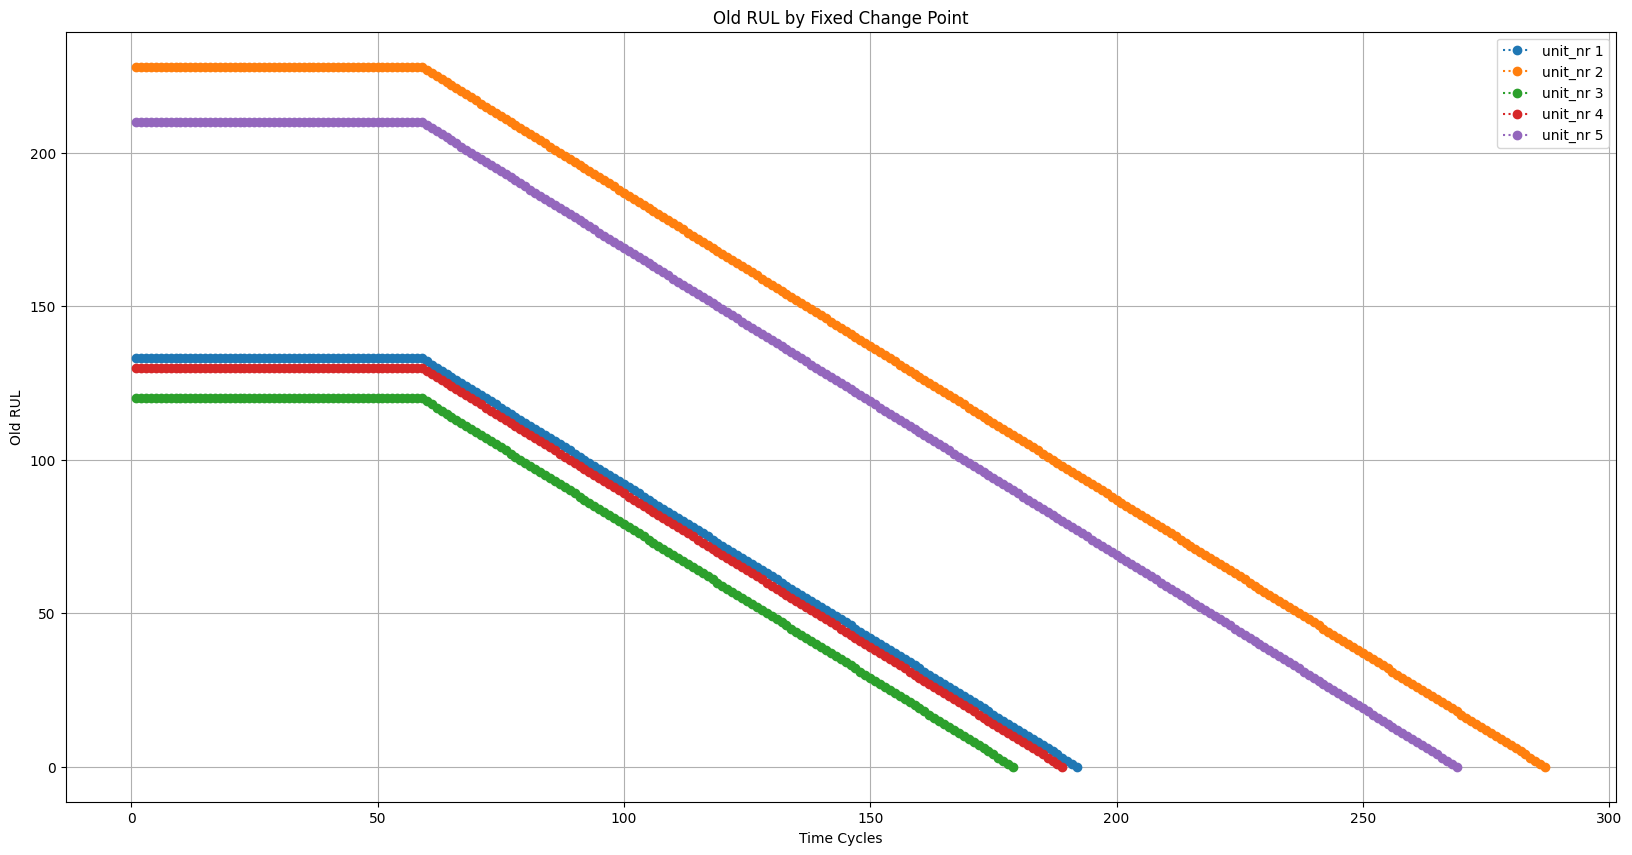

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 示例数据和计算最大循环次数
# 假设df已经被定义，并且包含'unit_nr'和'time_cycles'列
grouped_by_unit = df.groupby('unit_nr')
max_cycle = grouped_by_unit['time_cycles'].max()

# 合并最大循环次数回原始数据框架
result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)

# 选择特定的5个unit_nr进行操作
selected_unit_nrs = [1, 2, 3, 4, 5]
selected_units = result_frame[result_frame['unit_nr'].isin(selected_unit_nrs)]

# 找出max_cycle中的最小值并计算固定变换点
fixed_change_point = selected_units["max_cycle"].min() - 120

# 设置固定变换点，并计算old_RUL
selected_units['fixed_change_point'] = fixed_change_point
selected_units['old_RUL'] = np.where(
    selected_units["time_cycles"] < selected_units['fixed_change_point'],
    selected_units["max_cycle"] - selected_units['fixed_change_point'],
    selected_units["max_cycle"] - selected_units["time_cycles"]
)

# 绘制图表
plt.figure(figsize=(20, 10))
for unit_nr, group_data in selected_units.groupby('unit_nr'):
    plt.plot(group_data['time_cycles'], group_data['old_RUL'], marker='o', linestyle=':', label=f'unit_nr {unit_nr}')

plt.xlabel('Time Cycles')
plt.ylabel('Old RUL')
plt.title('Old RUL by Fixed Change Point')
plt.legend()
plt.grid(True)
plt.show()


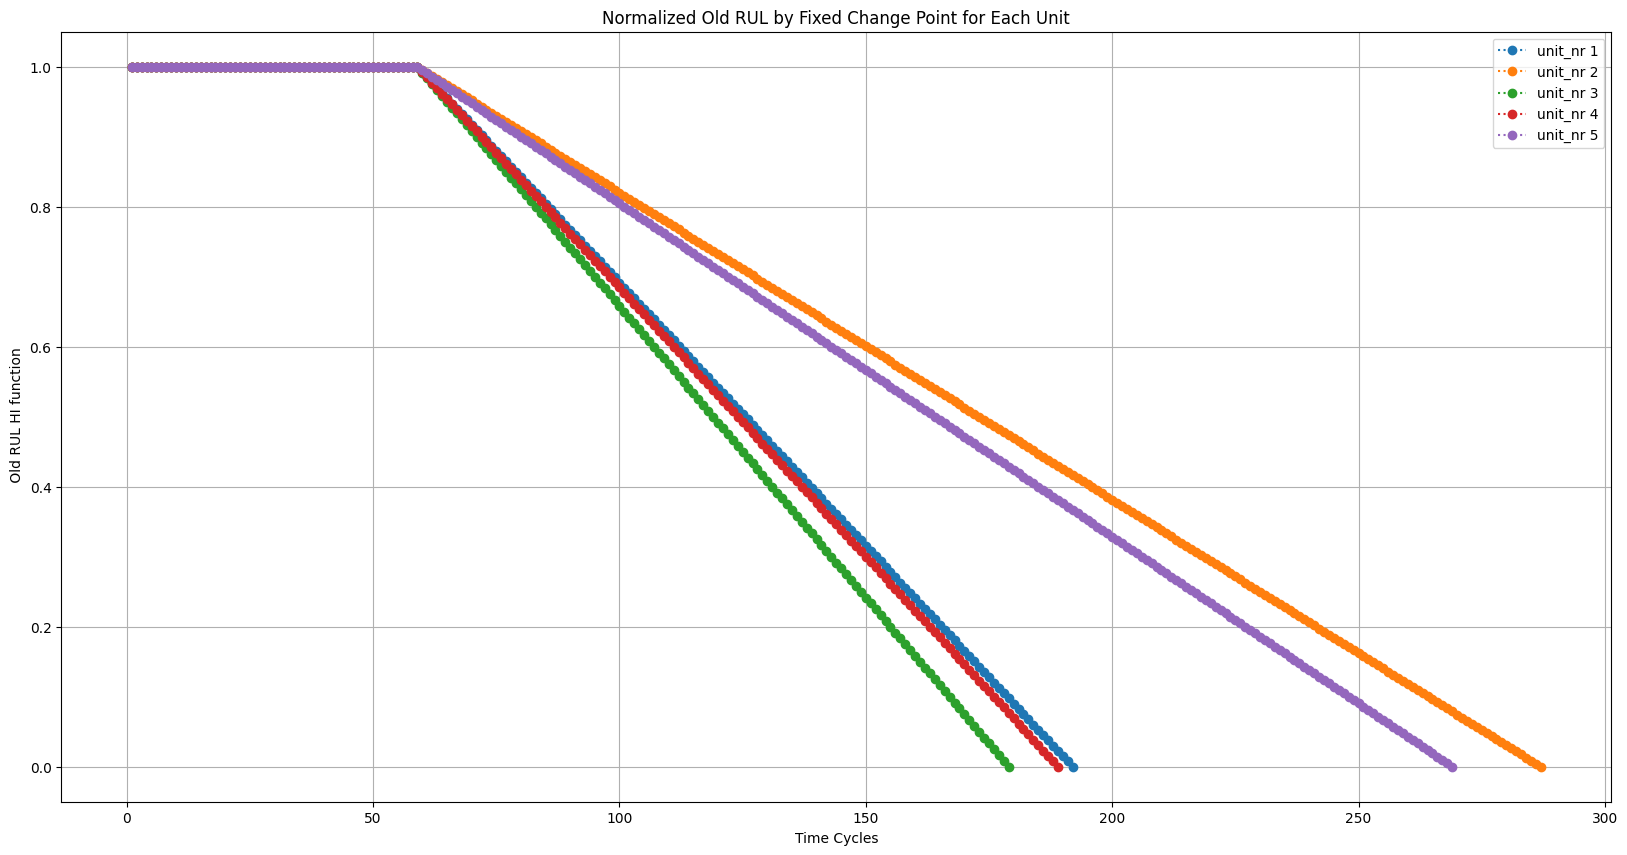

,unit_nr,time_cycles,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_15,s_17,s_20,s_21,max_cycle,fixed_change_point,old_RUL,normalized_old_RUL
0,1,1,0.097913,0.267551,0.239581,0.827487,0.241238,0.121035,0.213901,0.860780,0.209365,0.200387,0.159104,0.837652,0.845015,192,59,133,1.0
1,1,2,0.126227,0.270776,0.228968,0.819524,0.248750,0.120478,0.203646,0.847411,0.212081,0.200916,0.168389,0.834236,0.836324,192,59,133,1.0
2,1,3,0.152175,0.273742,0.219161,0.812443,0.255550,0.120009,0.194400,0.835312,0.214711,0.201415,0.177060,0.830996,0.828603,192,59,133,1.0
3,1,4,0.175842,0.276454,0.210135,0.806207,0.261665,0.119623,0.186122,0.824434,0.217255,0.201887,0.185136,0.827927,0.821809,192,59,133,1.0
4,1,5,0.197313,0.278918,0.201864,0.800775,0.267122,0.119318,0.178774,0.814728,0.219714,0.202336,0.192634,0.825021,0.815900,192,59,133,1.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 示例数据和计算最大循环次数
# 假设df已经被定义，并且包含'unit_nr'和'time_cycles'列
grouped_by_unit = df.groupby('unit_nr')
max_cycle = grouped_by_unit['time_cycles'].max()

# 合并最大循环次数回原始数据框架
result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)

# 选择特定的5个unit_nr进行操作
selected_unit_nrs = [1, 2, 3, 4, 5]
selected_units = result_frame[result_frame['unit_nr'].isin(selected_unit_nrs)].copy()  # 使用copy()防止警告



# 找出max_cycle中的最小值并计算固定变换点
fixed_change_point = selected_units["max_cycle"].min() - 120

# 使用loc进行安全的数据赋值
selected_units.loc[:, 'fixed_change_point'] = fixed_change_point
selected_units.loc[:, 'old_RUL'] = np.where(
    selected_units["time_cycles"] < selected_units['fixed_change_point'],
    selected_units["max_cycle"] - selected_units['fixed_change_point'],
    selected_units["max_cycle"] - selected_units["time_cycles"]
)

# 对每个单元的old_RUL进行归一化，使最大值为1
def normalize_rul(group):
    max_rul = group['old_RUL'].max()
    group['normalized_old_RUL'] = group['old_RUL'] / max_rul
    return group

# 应用归一化，并确保unit_nr仍然是列
selected_units = selected_units.groupby('unit_nr').apply(normalize_rul)

# Check to ensure 'unit_nr' is still a column
if 'unit_nr' not in selected_units:
    selected_units.reset_index(level=0, inplace=True)

# Reset index to ensure 'unit_nr' is treated as a column
selected_units.reset_index(drop=True, inplace=True)

# # 绘制图表
plt.figure(figsize=(20, 10))
for unit_nr, group_data in selected_units.groupby('unit_nr'):
    plt.plot(group_data['time_cycles'], group_data['normalized_old_RUL'], marker='o', linestyle=':', label=f'unit_nr {unit_nr}')

plt.xlabel('Time Cycles')
plt.ylabel(' Old RUL HI function')
plt.title('Normalized Old RUL by Fixed Change Point for Each Unit')
plt.legend()
plt.grid(True)
plt.show()
selected_units.head(5)

<ipython-input-53-e2397423af70>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_units['fixed_change_point'] = fixed_change_point
<ipython-input-53-e2397423af70>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_units['old_RUL'] = np.where(
<ipython-input-53-e2397423af70>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

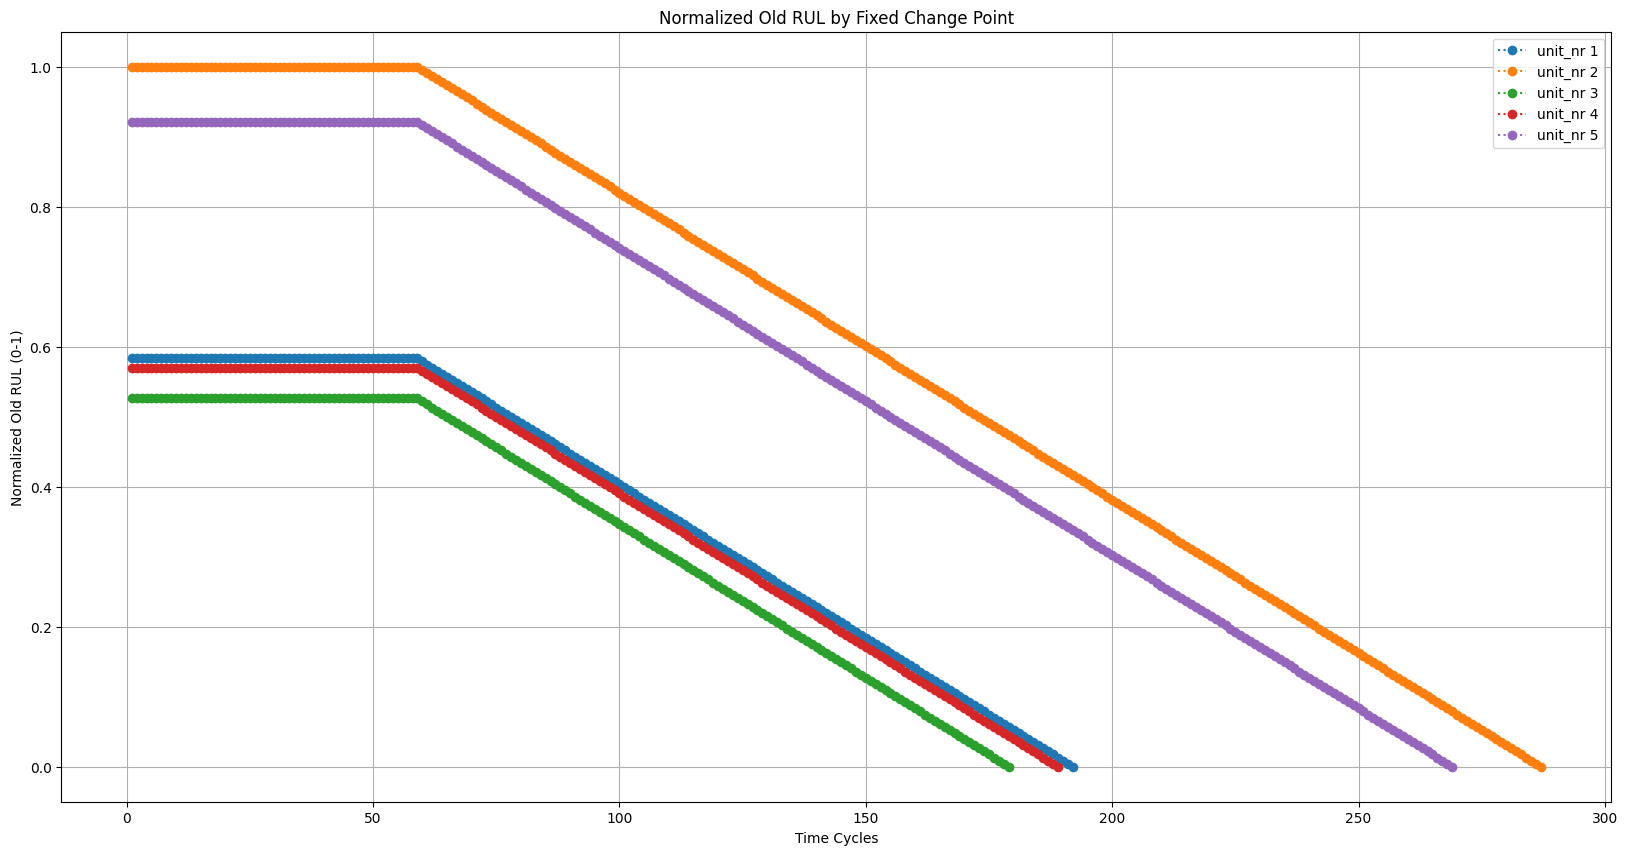

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # 示例数据和计算最大循环次数
# # 假设df已经被定义，并且包含'unit_nr'和'time_cycles'列
# grouped_by_unit = df.groupby('unit_nr')
# max_cycle = grouped_by_unit['time_cycles'].max()

# # 合并最大循环次数回原始数据框架
# result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)

# # 选择特定的5个unit_nr进行操作
# selected_unit_nrs = [1, 2, 3, 4, 5]
# selected_units = result_frame[result_frame['unit_nr'].isin(selected_unit_nrs)]

# # 找出max_cycle中的最小值并计算固定变换点
# fixed_change_point = selected_units["max_cycle"].min() - 120

# # 设置固定变换点，并计算old_RUL
# selected_units['fixed_change_point'] = fixed_change_point
# selected_units['old_RUL'] = np.where(
#     selected_units["time_cycles"] < selected_units['fixed_change_point'],
#     selected_units["max_cycle"] - selected_units['fixed_change_point'],
#     selected_units["max_cycle"] - selected_units["time_cycles"]
# )

# # 归一化处理以将Y轴的范围压缩至0到1之间
# selected_units['normalized_old_RUL'] = (selected_units['old_RUL'] - selected_units['old_RUL'].min()) / (selected_units['old_RUL'].max() - selected_units['old_RUL'].min())

# # 绘制图表
# plt.figure(figsize=(20, 10))
# for unit_nr, group_data in selected_units.groupby('unit_nr'):
#     plt.plot(group_data['time_cycles'], group_data['normalized_old_RUL'], marker='o', linestyle=':', label=f'unit_nr {unit_nr}')

# plt.xlabel('Time Cycles')
# plt.ylabel('Normalized Old RUL (0-1)')
# plt.title('Normalized Old RUL by Fixed Change Point')
# plt.legend()
# plt.grid(True)
# plt.show()
